In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

# Exploratory Precipitation Analysis

In [ ]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.id.desc()).first()
print(f"The most recent date in the data set is {recent_date[0]}.")

In [9]:
max_date = session.query(func.max(measurement.date))
for dates in max_date:
    recent_date = dt.datetime.strptime(dates[0], '%Y-%m-%d')
    print(recent_date)

2017-08-23 00:00:00


In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = recent_date - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
one_year_data = session.query(measurement).\
                    filter(measurement.date >= one_year_ago).all()

for row in one_year_data:
    print(row.date, row.prcp)

# Save the query results as a Pandas DataFrame and set the index to the date column\
one_year_df = pd.DataFrame(one_year_data, columns= ['date', 'precipitation'])
one_year_df.set_index('date', inplace=True)
one_year_df
# Sort the dataframe by date
#one_year_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
#one_year_df.plot.bar()
#plt.tight_layout()
#plt.show()



2016-08-24 0.08
2016-08-25 0.08
2016-08-26 0.0
2016-08-27 0.0
2016-08-28 0.01
2016-08-29 0.0
2016-08-30 0.0
2016-08-31 0.13
2016-09-01 0.0
2016-09-02 0.0
2016-09-03 0.0
2016-09-04 0.03
2016-09-05 None
2016-09-06 None
2016-09-07 0.05
2016-09-08 0.0
2016-09-09 0.03
2016-09-10 0.0
2016-09-11 0.05
2016-09-12 0.0
2016-09-13 0.02
2016-09-14 1.32
2016-09-15 0.42
2016-09-16 0.06
2016-09-17 0.05
2016-09-18 0.0
2016-09-19 0.0
2016-09-20 0.0
2016-09-21 0.0
2016-09-22 0.02
2016-09-23 0.0
2016-09-24 0.0
2016-09-25 0.0
2016-09-26 0.06
2016-09-27 0.02
2016-09-28 0.0
2016-09-29 0.0
2016-09-30 0.0
2016-10-01 0.0
2016-10-02 0.0
2016-10-03 0.0
2016-10-04 0.0
2016-10-05 0.0
2016-10-06 0.0
2016-10-07 0.0
2016-10-08 0.0
2016-10-09 0.0
2016-10-10 0.0
2016-10-11 0.0
2016-10-12 0.0
2016-10-13 0.0
2016-10-14 0.0
2016-10-15 0.0
2016-10-16 0.0
2016-10-17 0.01
2016-10-18 0.0
2016-10-19 0.0
2016-10-20 0.0
2016-10-21 0.05
2016-10-22 0.15
2016-10-23 0.01
2016-10-24 0.0
2016-10-25 0.03
2016-10-26 0.0
2016-10-27 0.0
20

ValueError: Shape of passed values is (2223, 1), indices imply (2223, 2)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station).count()
print(f"There are {total_stations} stations")

There are 9 stations


In [36]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activity =session.query(measurement.station, func.count(measurement.prcp)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.prcp).desc()).all()

activity

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
                    filter(measurement.station == 'USC00519281')

most_active_df = pd.DataFrame(most_active, columns=['station', 'min', 'max', 'average'])
most_active_df


,station,min,max,average
0,USC00519281,54.0,85.0,71.663781


Text(0.5, 0, 'Temperature')

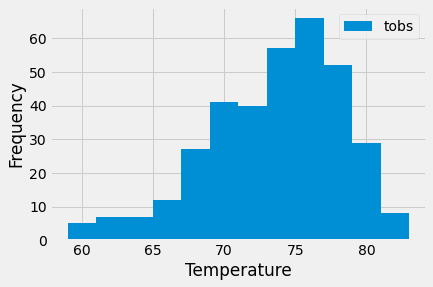

In [42]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_12 = session.query(measurement.tobs).\
                    filter(measurement.station == 'USC00519281').\
                    filter(measurement.date >= one_year_ago)

most_active_12_df = pd.DataFrame(most_active_12, columns=['tobs'])
most_active_12_df.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close session

In [ ]:
# Close Session
session.close()